In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json

In [15]:
def plot_metrics(attr):
    sns.set_theme(style="whitegrid", palette="pastel")
    fig, ax = plt.subplots(figsize=(10, 5))
    metric_info = pickle.load(open('../controlled-peptide-generation-master/output/amp/eval.{}.pkl'.format(attr), 'rb'))
    
    records = []
    metric_names = ['accuracy','precision','recall','F1-score']
    for dset in metric_info.keys():
        metrics = metric_info[dset]
        for idx, metric_name in enumerate(metric_names):
            records.append([dset, metric_name, metrics[idx]])
        
    records = pd.DataFrame(records, columns=['DataSet','Metric Name','Value'])
    records['attr'] = attr
    
    sns.barplot(data=records, x='Metric Name',y='Value', hue='DataSet')
    plt.title("Classification Model Evaluation on Attribution: {}".format(attr))
    plt.show()
    
    return records

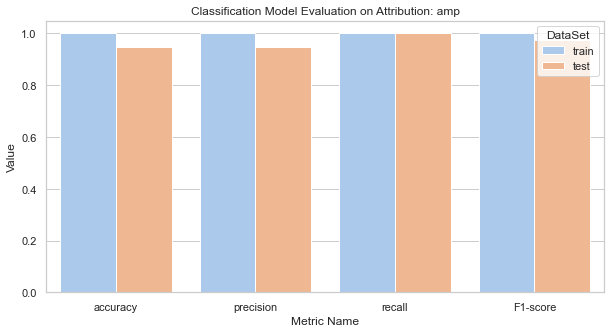

In [16]:
amp_eval = plot_metrics('amp')

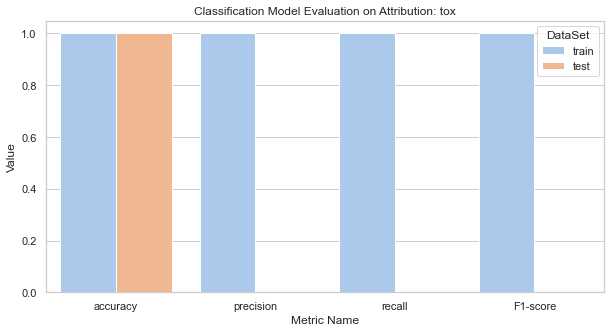

In [17]:
tox_eval = plot_metrics('tox')

# plot loss

In [3]:
loss = json.load(open('../controlled-peptide-generation-master/output/amp/result.json','r'))

In [4]:
print(len(loss))

401


In [5]:
loss[0].keys()

dict_keys(['it', 'train_z_mu_L1', 'train_z_logvar', 'train_z_logvar_L1', 'train_z_logvar_KL_penalty', 'train_L_vae', 'train_L_vae_recon', 'train_L_vae_kl', 'train_L_wae_mmd', 'train_L_wae_mmdrf', 'train_beta'])

In [7]:
def plot_loss(loss, key):
    sns.set_theme(style="whitegrid", palette="pastel")
    fig, ax = plt.subplots(figsize=(10, 5))
    
    idx = [x['it'] for x in loss]
    value = [x[key] for x in loss]
    
    plt.plot(idx, value)
    plt.title("Training {} Curve".format(key))
    plt.ylabel(key)
    plt.xlabel("Iterations")
    
    plt.show()
    

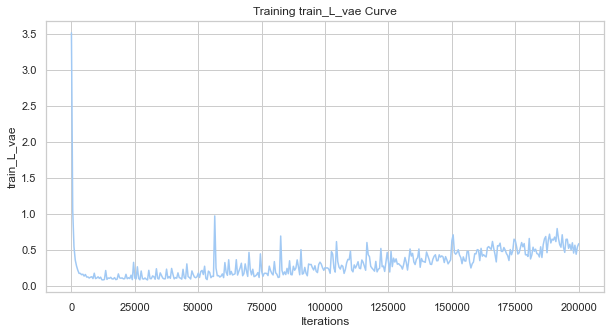

In [8]:
plot_loss(loss, 'train_L_vae')

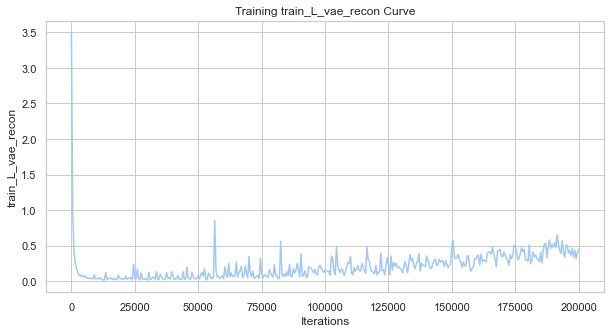

In [9]:
plot_loss(loss, 'train_L_vae_recon')

In [69]:
import torch
t4d = torch.ones(1, 10)

In [70]:
import torch.nn.functional as F
p1d = (0, 10) # pad last dim by 1 on each side
out = F.pad(t4d, p1d, "constant", 0.0)  # effec

In [71]:
out.shape

torch.Size([1, 20])

In [72]:
out

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [73]:
t4d

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])